In [249]:
# X(X1,X2) y(0/1/2/3/)  二元四个分类
import numpy as np
import matplotlib.pyplot as plt

In [250]:
np.random.seed(0)
Num = 100

In [251]:
x_1 = np.random.normal(-3,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(-3,1,size=(Num)) #不让他们重合 这里将他们反过来
y = np.zeros(Num)     
c_0 = np.array([x_1,x_2,y]) # 0分类

In [252]:
x_1 = np.random.normal(3,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(-3,1,size=(Num)) #不让他们重合 这里将他们反过来
y = np.ones(Num)     
c_1 = np.array([x_1,x_2,y]) # 1分类

In [253]:
x_1 = np.random.normal(-3,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(3,1,size=(Num)) #不让他们重合 这里将他们反过来
y = np.ones(Num)*2    
c_2 = np.array([x_1,x_2,y]) # 2分类

In [254]:
x_1 = np.random.normal(3,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(3,1,size=(Num)) #不让他们重合 这里将他们反过来
y = np.ones(Num)*3    
c_3 = np.array([x_1,x_2,y]) # 3分类

In [255]:
c_0.shape

(3, 100)

In [256]:
c_0=c_0.T
c_1=c_1.T
c_2=c_2.T
c_3=c_3.T
c_0.shape

(100, 3)

In [257]:
#c_0

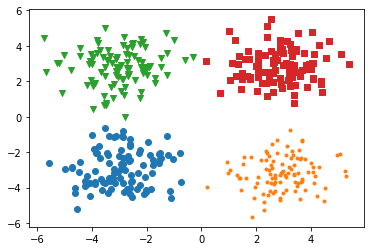

In [258]:
plt.scatter(c_0[:,0],c_0[:,1],marker = 'o')
plt.scatter(c_1[:,0],c_1[:,1],marker = '.')
plt.scatter(c_2[:,0],c_2[:,1],marker = 'v')
plt.scatter(c_3[:,0],c_3[:,1],marker = 's')

In [259]:
All_data = np.concatenate((c_0,c_1,c_2,c_3))
np.random.shuffle(All_data)#,将这个200行打乱,一般是shuffle第一个维度也就是行
All_data.shape

(400, 3)

In [260]:
train_data_X = All_data[:300,:2]
train_data_y = All_data[:300,-1].reshape(300,1)# 直接这样是个向量现在想要一个矩阵
test_data_X = All_data[300:,:2]
test_data_y = All_data[300:,-1].reshape(100,1)
train_data_X.shape,train_data_y.shape,test_data_X.shape,test_data_y.shape

((300, 2), (300, 1), (100, 2), (100, 1))

In [261]:
# y =wx +b   
# y=w1*x1 + w2*x2 +b  在这里有四组w1,w2
# 0 =w1*x1 + w2*x2 +b  
# y = -1*(w1*x+b)/w2
W = np.random.rand(4,2)
W

array([[0.99423308, 0.61476989],
       [0.0371296 , 0.01425152],
       [0.34210388, 0.82347172],
       [0.86613471, 0.96081253]])

In [262]:
bias = np.random.rand(1,4)
bias.shape



(1, 4)

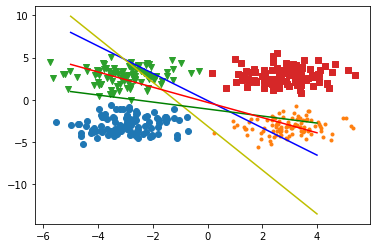

In [263]:
plt.scatter(c_0[:,0],c_0[:,1],marker = 'o')
plt.scatter(c_1[:,0],c_1[:,1],marker = '.')
plt.scatter(c_2[:,0],c_2[:,1],marker = 'v')
plt.scatter(c_3[:,0],c_3[:,1],marker = 's')
x = np.arange(-5,5)
y1 = -(W[0,0]*x +bias[0,0])/W[0,1]
plt.plot(x,y1,'b')
y2 = -(W[1,0]*x +bias[0,1])/W[1,1]
plt.plot(x,y2,'y')
y3 = -(W[2,0]*x +bias[0,2])/W[2,1]
plt.plot(x,y3,'g')
y4 = -(W[3,0]*x +bias[0,3])/W[3,1]
plt.plot(x,y4,'r')

In [264]:
#softmax(x) = e^X / sum(e^x)
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

In [265]:
a = np.array([1,2,3])
softmax(a)

array([0.09003057, 0.24472847, 0.66524096])

In [266]:
b = np.array([1,2,3,4,5,6]).reshape(2,3)#这个是全部加完   对向量可以
softmax(b)

array([[0.00426978, 0.01160646, 0.03154963],
       [0.08576079, 0.23312201, 0.63369132]])

In [267]:
def softmax(z):  #矩阵需要分开每一行
    exp = np.exp(z)
    sum_exp = np.sum(np.exp(z),axis=1,keepdims = True)
    return exp/sum_exp

In [268]:
b = np.array([1,2,3,5,5,6]).reshape(2,3)#这个是全部加完   对矩阵可以
softmax(b)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.21194156, 0.21194156, 0.57611688]])

In [269]:
 # one - hot函数
 # temp 1,2,3,4 [0,0,1,0] 
def one_hot(temp):
    one_hot = np.zeros( (len(temp) , len(np.unique(temp))) )  #行数:有多少个样本 列数:有多少个不同的元素  再加一个括号变成元组
    one_hot[np.arange(len(temp)),temp.astype(np.int).T]=1
    return one_hot

In [270]:
one_hot( train_data_y)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [271]:
#计算y_hat
def compute_y_hat(W,X,b):
    return np.dot(X,W.T)+b

In [272]:
train_data_X.shape,W.shape,bias.shape

((300, 2), (4, 2), (1, 4))

In [273]:
#计算交叉熵
def cross_entropy(y,y_hat):
    loss = -(1/len(y))*np.sum(y*np.log(y_hat))
    return loss

In [274]:
# w = w - lr*grad
lr = 0.001
ALL_loss=[]
for i in range(10000):
    #计算loss
    X = train_data_X
    y = one_hot(train_data_y)
    y_hat = softmax(compute_y_hat(W,X,bias))
    loss = cross_entropy(y,y_hat)
    ALL_loss.append(loss)
    #计算梯度
    grad_w = (1/len(X))*np.dot(X.T,(y_hat - y))
    grad_b = (1/len(X))*np.sum(y_hat -y)
    #更新参数
    W = W - lr*grad_w.T
    bias = bias - lr*grad_b
    #输出
    if i%300 == 1:
         print('i:%d, loss: %f'%(i,loss))

i:1, loss: 1.833425
i:301, loss: 0.952549
i:601, loss: 0.518215
i:901, loss: 0.343816
i:1201, loss: 0.267130
i:1501, loss: 0.224292
i:1801, loss: 0.196245
i:2101, loss: 0.176068
i:2401, loss: 0.160658
i:2701, loss: 0.148401
i:3001, loss: 0.138360
i:3301, loss: 0.129946
i:3601, loss: 0.122771
i:3901, loss: 0.116564
i:4201, loss: 0.111130
i:4501, loss: 0.106324
i:4801, loss: 0.102038
i:5101, loss: 0.098186
i:5401, loss: 0.094703
i:5701, loss: 0.091534
i:6001, loss: 0.088637
i:6301, loss: 0.085976
i:6601, loss: 0.083521
i:6901, loss: 0.081248
i:7201, loss: 0.079136
i:7501, loss: 0.077168
i:7801, loss: 0.075329
i:8101, loss: 0.073606
i:8401, loss: 0.071986
i:8701, loss: 0.070462
i:9001, loss: 0.069023
i:9301, loss: 0.067663
i:9601, loss: 0.066375
i:9901, loss: 0.065153


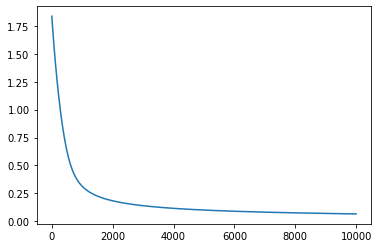

In [275]:
plt.plot(ALL_loss)

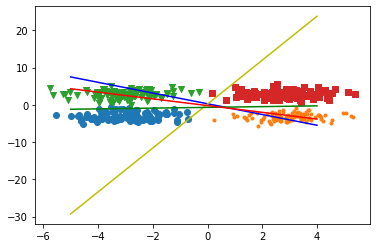

In [276]:
plt.scatter(c_0[:,0],c_0[:,1],marker = 'o')
plt.scatter(c_1[:,0],c_1[:,1],marker = '.')
plt.scatter(c_2[:,0],c_2[:,1],marker = 'v')
plt.scatter(c_3[:,0],c_3[:,1],marker = 's')
x = np.arange(-5,5)
y1 = -(W[0,0]*x +bias[0,0])/W[0,1]
plt.plot(x,y1,'b')
y2 = -(W[1,0]*x +bias[0,1])/W[1,1]
plt.plot(x,y2,'y')
y3 = -(W[2,0]*x +bias[0,2])/W[2,1]
plt.plot(x,y3,'g')
y4 = -(W[3,0]*x +bias[0,3])/W[3,1]
plt.plot(x,y4,'r')

In [289]:
#测试集预测
test_data_y.shape
# test_data_y

(100, 1)

In [278]:
def predict(x):
    y_hat = softmax(compute_y_hat(W,x,bias)) #100,4  最新的W 最新的bias
    return np.argmax(y_hat,axis = 1) #最大的位置 第二维度比较

In [279]:
predict(test_data_X).shape

(100,)

In [286]:
a=predict(test_data_X).reshape(100,1)

In [290]:
# a

In [288]:
np.sum(a == test_data_y)/len(test_data_y)

1.0

In [282]:
predict(test_data_X) == test_data_y

array([[ True, False, False, ...,  True, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True, False, False, ...,  True, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])